In [2]:
import sys; sys.path.append("..")
from epi_model import *

In [3]:
import pickle
with open('2.1a full_run.pickle', 'rb') as inf:
    ms = pickle.load( inf )

In [4]:
strats = [
    ('friend', 'nomination (random)'),
    ('friendHighDeg', 'nomination (degree)'),
    ('nominate_local_betweenness', 'nomination (local betweenness)'),
    ('local_betweenness', 'local betweenness'),
    ('targeted', 'degree'),
    ('rand', 'random'),
    ('none', 'no intervention'),
]

In [5]:
statsd = dict(strats)

In [6]:
K, KN = list(zip(*strats))

In [7]:
ms_d = {}

In [8]:
rows = []

for (tnet, s2e, n_vacc, name), m in sorted(ms.items()):
    xs = [x[-1] for x in m]
    
    mn = np.mean(xs)
    sd = np.std(xs)
    
    mx = max([x[-1] for x in m])
    
    ms_d[ (tnet, s2e, n_vacc, name) ] = [mn,mx,sd]
    
    if name not in statsd:
        continue
    
    rows.append([
        tnet, s2e, n_vacc, statsd[name],
        f"{mn:0.1f} +/- {1.96 * sd / np.sqrt(len(xs)):0.1f}",mx
    ])

In [9]:
from tabulate import tabulate

In [10]:
display(HTML(tabulate(rows, tablefmt='html')))

0,0.05,0.05,nomination (random),40.3 +/- 1.0,71
0,0.05,0.05,nomination (degree),38.8 +/- 0.8,65
0,0.05,0.05,local betweenness,37.9 +/- 0.8,65
0,0.05,0.05,nomination (local betweenness),38.6 +/- 0.8,72
0,0.05,0.05,no intervention,43.0 +/- 0.9,73
0,0.05,0.05,random,41.1 +/- 0.9,71
0,0.05,0.05,degree,37.3 +/- 0.8,65
0,0.05,0.1,nomination (random),38.1 +/- 0.8,72
0,0.05,0.1,nomination (degree),36.4 +/- 0.7,55
0,0.05,0.1,local betweenness,34.6 +/- 0.7,54
0,0.05,0.1,nomination (local betweenness),35.9 +/- 0.7,55


In [11]:
types = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']

In [12]:
from itertools import groupby
grps = groupby(ms.items(), key=lambda x:list(x[0])[:-1])

In [13]:
grps = [ (a, list(b)) for a,b in grps ]

In [14]:
to_show = ['rand', 'friend', 'friendHighDeg', 'local_betweenness', 'none']

In [15]:
order = range(100)

In [16]:
order = list(np.argsort([
    np.mean([v[0] for kk,v in ms_d.items() if kk[-1]==k]) 
    for k in to_show
]))

In [17]:
# geesh everything is mixed...
#to_show = sorted(to_show, key=lambda k:-np.mean([v[0] for kk,v in ms_d.items() if kk[-1]==k]))

In [18]:
to_show = ['none', 'rand', 'friend', 'friendHighDeg', 'local_betweenness']

In [19]:
from matplotlib import patches

In [20]:
alph = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

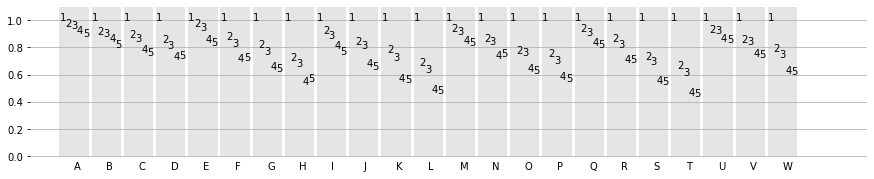

In [22]:
fig = plt.figure(figsize=(15,3))
ax = plt.axes()
plt.box(False)

col = 0
for a,b in sorted( grps, key=lambda x:x[0] ):
    base_k = tuple( a + ['none'] )
    if base_k not in ms_d:
        continue
        
    base = ms_d[base_k][0]
    for i,kk in enumerate(to_show):            
        k = tuple(a + [kk])
            
        x,y = col*1.1 + i*0.2, ms_d[k][0] / base
        plt.text(x,y, str(i+1))#, marker=types[i])
        #plt.scatter(x,y+0.1, s=5, color='black', edgecolors=None)
        
    col += 1
    #print(i)
    
    rect = patches.Rectangle(
        ((col-1)*1.1, 0), 1, 1.1, 
        linewidth=1, 
        edgecolor='none', facecolor='grey', alpha=0.2)
    #plt.scatter(2,0.5)
    # Add the patch to the Axes
    ax.add_patch(rect)
    plt.text((col-1.1/2)*1.1, -0.1, alph[col-1])
    #print(alph[col-1])

    
plt.xlim(-1,col*1.2)
plt.ylim(-0.1,1.1)
plt.grid(True, 'major','y')
plt.xticks([]);

In [78]:
[x[0] for x in b]

[(0, 0.05, 15, 'rand_0'),
 (0, 0.05, 15, 'friend_1'),
 (0, 0.05, 15, 'friendHighDeg_2'),
 (0, 0.05, 15, 'targeted_3'),
 (0, 0.05, 15, 'local_betweenness_4'),
 (0, 0.05, 15, 'nominate_local_betweenness_5'),
 (0, 0.05, 15, 'none_6')]

In [5]:
tnets = sorted(set(x[0] for x in ms.keys()))
s2es = sorted(set(x[1] for x in ms.keys()))
n_vaccs = sorted(set(x[2] for x in ms.keys()))
names = sorted(set(x[3] for x in ms.keys()))

In [6]:
(tnets,s2es,n_vaccs,names)

([0, 1],
 [0.05, 0.1, 0.15, 0.2],
 [15, 31, 39, 46, 62, 78, 117, 156],
 ['friendHighDeg_2',
  'friend_1',
  'local_betweenness_4',
  'nominate_local_betweenness_5',
  'none_6',
  'rand_0',
  'targeted_3'])

In [7]:
k, v = list(ms.items())[0]

# percentage differences

In [160]:
from itertools import groupby
grps = groupby(ms.items(), key=lambda x:list(x[0])[:-1])

In [161]:
grps = [ (a, list(b)) for a,b in grps ]

In [165]:
grps[0][1][0][0]

(0, 0.05, 0.05, 'friendHighDegClose')

In [212]:
set(x[-1] for x in ms.keys())

{'friend',
 'friendClose',
 'friendHighDeg',
 'friendHighDegClose',
 'local_betweenness',
 'nominate_local_betweenness',
 'none',
 'rand',
 'targeted'}

In [244]:
to_show = ['none', 'rand', 'friend', 'nominate_local_betweenness', 'targeted', 'friendHighDeg']

In [245]:
#mat = np.zeros(  )

mat = np.zeros( (len(to_show),len(grps)) ) 

for i, (kk,gg) in enumerate(grps):
    for ki,k in enumerate(to_show):
        my_key = tuple(kk+[k])
        if my_key not in ms_d:
            continue
        mat[ki,i] = ms_d[my_key][0]            

In [246]:
mat.shape

(6, 24)

In [247]:
len(to_show)

6

In [248]:
mat[0,:]

array([ 43.01      ,  43.12666667,  43.85666667,  42.80666667,
        97.58      ,  97.39666667,  98.07333333,  94.88      ,
        74.29333333,  75.48666667,  75.80666667,  77.31666667,
       289.69333333, 283.93666667, 295.94666667, 290.53333333,
       114.30666667, 112.85      , 113.14333333, 113.81      ,
       483.4       , 480.8       , 479.71666667,   0.        ])

In [249]:
divs = (mat / mat[0,:]).T

c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [250]:
divs.shape

(24, 6)

In [251]:
wid,hei = divs.shape

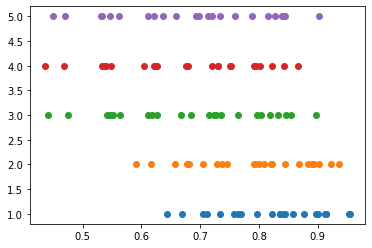

In [252]:
for i in range(1,hei):
    plt.scatter(divs[:,i], [i]*wid)

c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


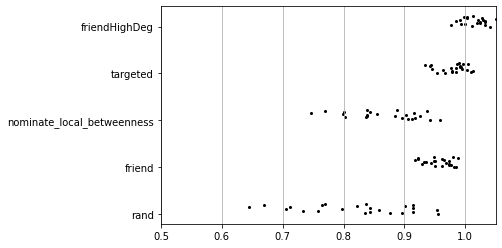

In [253]:
from random import random

for i in range(1,hei):
    plt.scatter(mat[i,:] / mat[i-1,:], [i + ij*0.01 for ij in range(wid)],
               s=4, color='black')
plt.yticks(range(1,hei), to_show[1:])
plt.xlim(0.5,1.05)
plt.grid(True,'major','x')